<a href="https://colab.research.google.com/github/aljeshishe/notebooks/blob/master/visualize_vgg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras.applications.vgg16 import VGG16
# load the model
model = VGG16()
# summarize the model
model.summary()

Using TensorFlow backend.


Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [2]:
for layer in model.layers:
  if 'conv' not in layer.name:
    continue
  print(layer, layer.name, layer.output.shape)

<keras.layers.convolutional.Conv2D object at 0x7f216d4d8f60> block1_conv1 (None, 224, 224, 64)
<keras.layers.convolutional.Conv2D object at 0x7f216d4fa208> block1_conv2 (None, 224, 224, 64)
<keras.layers.convolutional.Conv2D object at 0x7f216d4fa630> block2_conv1 (None, 112, 112, 128)
<keras.layers.convolutional.Conv2D object at 0x7f216cca44e0> block2_conv2 (None, 112, 112, 128)
<keras.layers.convolutional.Conv2D object at 0x7f216cca4fd0> block3_conv1 (None, 56, 56, 256)
<keras.layers.convolutional.Conv2D object at 0x7f216ccadbe0> block3_conv2 (None, 56, 56, 256)
<keras.layers.convolutional.Conv2D object at 0x7f216ccb3780> block3_conv3 (None, 56, 56, 256)
<keras.layers.convolutional.Conv2D object at 0x7f216ccbc208> block4_conv1 (None, 28, 28, 512)
<keras.layers.convolutional.Conv2D object at 0x7f216ccbcd30> block4_conv2 (None, 28, 28, 512)
<keras.layers.convolutional.Conv2D object at 0x7f21672348d0> block4_conv3 (None, 28, 28, 512)
<keras.layers.convolutional.Conv2D object at 0x7f21672

In [3]:
filters, b = model.layers[1].get_weights()
filters.shape

(3, 3, 3, 64)

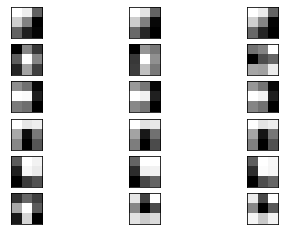

In [4]:
# cannot easily visualize filters lower down
from keras.applications.vgg16 import VGG16
from matplotlib import pyplot
# load the model
model = VGG16()
# retrieve weights from the second hidden layer
filters, biases = model.layers[1].get_weights()
# normalize filter values to 0-1 so we can visualize them
f_min, f_max = filters.min(), filters.max()
filters = (filters - f_min) / (f_max - f_min)
# plot first few filters
n_filters, ix = 6, 1
for i in range(n_filters):
	# get the filter
	f = filters[:, :, :, i]
	# plot each channel separately
	for j in range(3):
		# specify subplot and turn of axis
		ax = pyplot.subplot(n_filters, 3, ix)
		ax.set_xticks([])
		ax.set_yticks([])
		# plot filter channel in grayscale
		pyplot.imshow(f[:, :, j], cmap='gray')
		ix += 1
# show the figure
pyplot.show()

In [0]:
from keras.preprocessing.image import img_to_array, load_img
from keras.applications.vgg16 import preprocess_input, decode_predictions
from numpy import expand_dims 

from keras.applications.vgg16 import VGG16
from matplotlib import pyplot
# load the model
model = VGG16()


In [0]:
import requests
img_file_name = 'bird.jpg'
r = requests.get('https://media.gettyimages.com/photos/idyllic-home-with-covered-porch-picture-id479767332?s=612x612')
r.raise_for_status()
with open(img_file_name, 'wb') as fp:
  fp.write(r.content)

(1, 224, 224, 64)


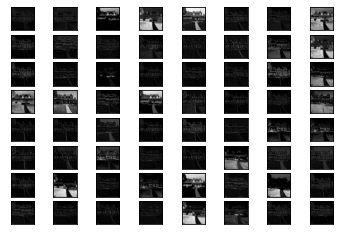

(1, 112, 112, 128)


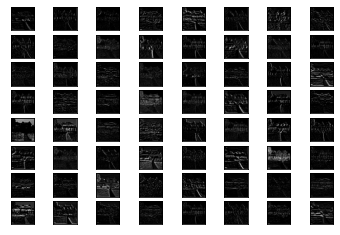

(1, 56, 56, 256)


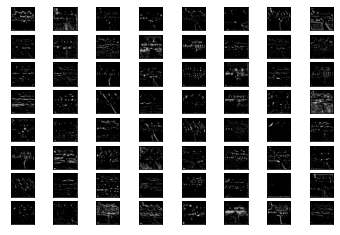

(1, 28, 28, 512)


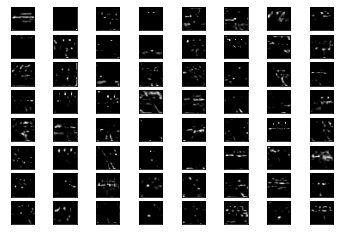

(1, 14, 14, 512)


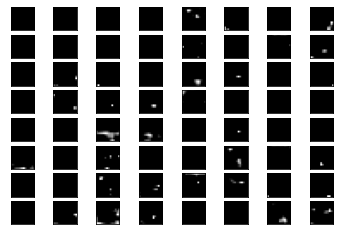

In [8]:

from keras.applications.vgg16 import preprocess_input
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import Model
from matplotlib import pyplot
from numpy import expand_dims
# load the model
# redefine model to output right after the first hidden layer
ixs = [2, 5, 9, 13, 17]
outputs = [model.layers[i].output for i in ixs]
m = Model(inputs=model.inputs, outputs=outputs)
# load the image with the required shape
img = load_img('bird.jpg', target_size=(224, 224))
# convert the image to an array
img = img_to_array(img)
# expand dimensions so that it represents a single 'sample'
img = expand_dims(img, axis=0)
# prepare the image (e.g. scale pixel values for the vgg)
img = preprocess_input(img)
# get feature map for first hidden layer
feature_maps = m.predict(img)
# plot the output from each block
square = 8
for fmap in feature_maps:
  print(fmap.shape)
  ix = 1
  for _ in range(square):
    for _ in range(square):
      # specify subplot and turn of axis
      ax = pyplot.subplot(square, square, ix)
      ax.set_xticks([])
      ax.set_yticks([])
      # plot filter channel in grayscale
      pyplot.imshow(fmap[0, :, :, ix-1], cmap='gray')
      ix += 1
  # show the figure
  pyplot.show()

